<a href="https://colab.research.google.com/github/valesierrai/Analitica-de-Negocios/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL

0. Se cargan Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

1. Se carga la Base de Datos

In [ ]:
XDB=pd.read_excel('/content/Blood_Pressure.xlsx')
XDB=XDB[['Blood_Pressure','Level_Hemoglobin','Age','Sex','Smoking','Physical_Activity','Level_Stress','Chronic_Kidney_Disease']]
XDB=XDB.dropna()

#Configuración de la matriz de entrada y del vector de datos deseaso
XD=np.array(XDB[['Level_Hemoglobin','Age','Sex','Smoking','Physical_Activity','Level_Stress','Chronic_Kidney_Disease']])
yd=np.array(XDB[['Blood_Pressure']])


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


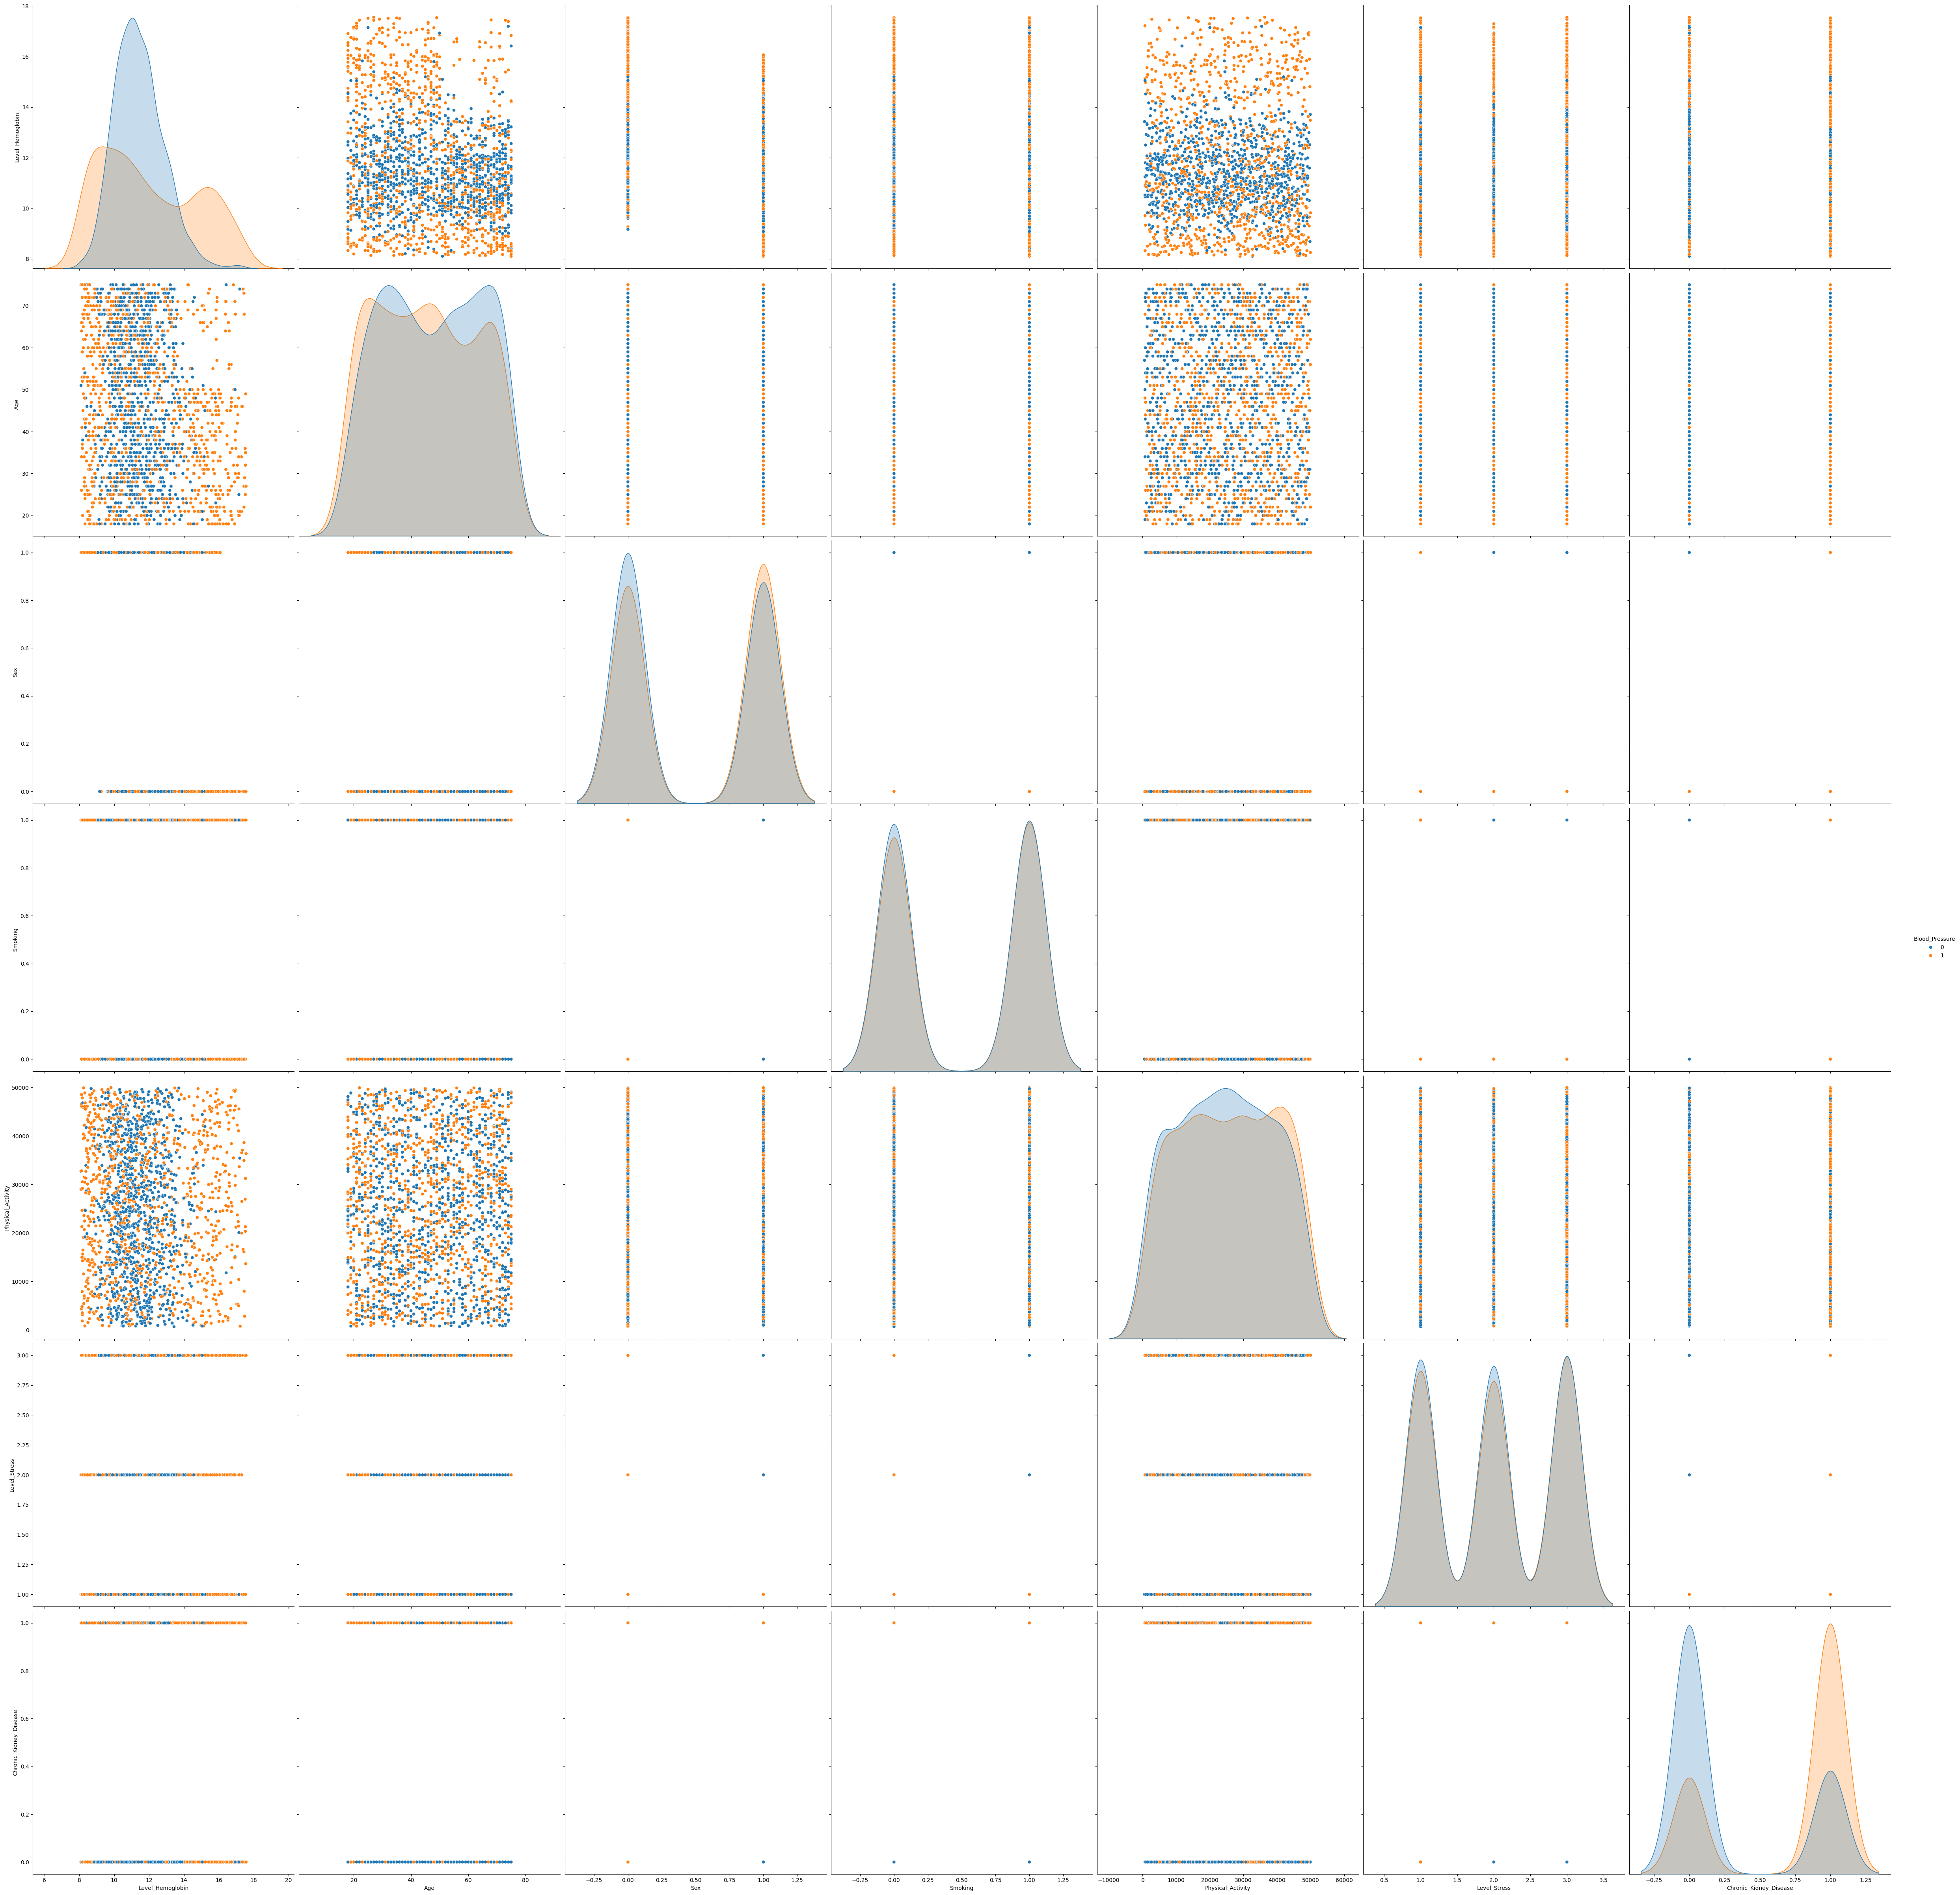

In [ ]:
#Se crea el DashBoard
sns.pairplot(XDB,hue='Blood_Pressure',size=7,vars=['Level_Hemoglobin','Age','Sex','Smoking','Physical_Activity','Level_Stress','Chronic_Kidney_Disease'])

In [ ]:
#Se procede con la correlación entre las variables
dfcorrel=pd.DataFrame(np.column_stack((XD[:,0],XD[:,1],XD[:,2],XD[:,3],XD[:,4],XD[:,5],XD[:,6],yd)))
dfcorrel.columns=['Level_Hemoglobin','Age','Sex','Smoking','Physical_Activity','Level_Stress','Chronic_Kidney_Disease','Blood_Pressure']
dfcorrel.corr()
dfcorrel.to_excel('InformeCorrel.xlsx')

,Level_Hemoglobin,Age,Sex,Smoking,Physical_Activity,Level_Stress,Chronic_Kidney_Disease,Blood_Pressure
Level_Hemoglobin,1.000000,-0.184394,-0.412928,0.023349,-0.026604,0.004746,0.055262,0.139488
Age,-0.184394,1.000000,0.057941,0.025314,0.027068,0.014057,-0.057540,-0.066322
Sex,-0.412928,0.057941,1.000000,-0.000848,0.006297,0.000729,0.026082,0.054902
Smoking,0.023349,0.025314,-0.000848,1.000000,-0.014974,-0.026398,-0.025196,0.012250
Physical_Activity,-0.026604,0.027068,0.006297,-0.014974,1.000000,-0.033700,0.003938,0.037952
Level_Stress,0.004746,0.014057,0.000729,-0.026398,-0.033700,1.000000,0.018669,0.009304
Chronic_Kidney_Disease,0.055262,-0.057540,0.026082,-0.025196,0.003938,0.018669,1.000000,0.429188
Blood_Pressure,0.139488,-0.066322,0.054902,0.012250,0.037952,0.009304,0.429188,1.000000


2. Se implementa el modelo de clasificación (Árbol de Decisión)

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)

#Evaluamos el modelo
ydp=mar.predict(XD)
cm=confusion_matrix(yd,ydp)
print('La matriz de confusión es:',cm)

ma=['Level_Hemoglobin','Age','Sex','Smoking','Physical_Activity','Level_Stress','Chronic_Kidney_Disease'] #Titulos árbol
dot_data=export_graphviz(mar,feature_names=ma) #coloque los nombres
graph=graph_from_dot_data(dot_data) #crear el gráfico
graph.write_png ('Arbol_PresiónArterial.png')

La matriz de confusión es: [[707 306]
 [158 829]]


True

In [ ]:
#Se evalua el modelo
VP=cm[0,0];FN=cm[0,1]
FP=cm[1,0];VN=cm[1,1]
#0. Comportamiento general del modelo (Exactitud)
print("La exactitud es: ",(VP+VN)/(VP+FN+FP+VN))
#1. El coeficiente de Especificidad (Como se comportó el modelo pronosticando los negativos)
print("Especificidad: ",VN/(VN+FP))
#2. La Tasa de Error
print("La Tasa de Error es:",(FN+FP)/(VP+VN+FP+FN))
#3. La Precisión
print("La precisión es:", VP / (VP + FP))
#4. La sensibilidad
print("La sensibilidad es:", (VP) / (VP + FN))

La exactitud es:  0.768
Especificidad:  0.839918946301925
La Tasa de Error es: 0.232
La precisión es: 0.8173410404624277
La sensibilidad es: 0.6979269496544916


3. Implementacion de modelos neuronales (ADALINE Y MADALINE)

In [ ]:
#Datos en Bruto
XD1=np.array(XDB[['Age','Sex','Smoking','Physical_Activity','Level_Stress','Chronic_Kidney_Disease']])
yd1=np.array(XDB[['Level_Hemoglobin']])

#Se normalizan los datos
#Procedemos con la normalización
XDn=XD1/np.max(XD1,axis=0) #Axis=0 busca el max por columnas
ydn=1/1/(1+np.exp(-yd1))

3.1. ADALINE

Epoch 1/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.4611
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.2908
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.1221
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 5.9577
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 5.7964
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 5.6377
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 5.4831
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 5.3324
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 5.1832
Epoch 10/1000
10/10 [==============================] - 0s 2ms/step - loss: 5.0396
Epoch 11/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.8967
Epoch 12/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.7588
Epoch 13/1000
10/10 [====

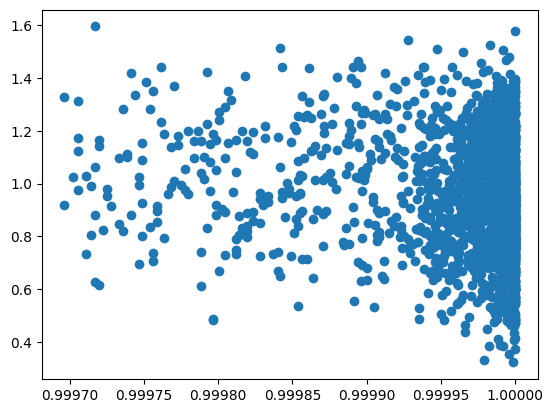

La correlación es:           0         1
0  1.000000 -0.146133
1 -0.146133  1.000000
Los efectos independintes son:
 [array([[0.56196743],
       [0.07706296],
       [0.10457509],
       [0.3168157 ],
       [0.43959123],
       [0.10814047]], dtype=float32)]


<Figure size 640x480 with 0 Axes>

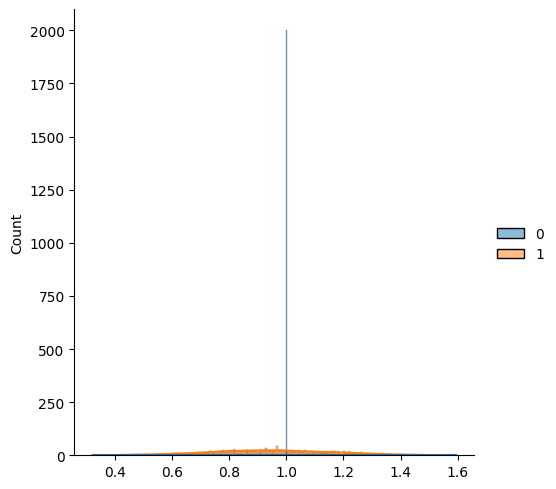

In [ ]:
NE=6 #Definimos número de entradas
model=Sequential() #Cortez Cerebrales

model.add(Dense(1,activation='linear',use_bias=False,input_dim=NE))
model.compile(optimizer='adam',loss='mse')
history=model.fit(XDn,ydn,epochs=1000,batch_size=200)
ys=model.predict(XDn)

#Gráfico de Dispersión
plt.figure()
plt.scatter(ydn,ys)
plt.show()

#Matriz de Correlación
df=pd.DataFrame(np.column_stack((ydn,ys)))
df.corr()
print("La correlación es:",df.corr())

#Efectos Independientes
W=model.layers[0].get_weights()
print("Los efectos independintes son:\n",W)

#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydn.flatten(),ys.flatten()),kde=True)
plt.show()

La discrepancia entre medias es: 5.001551261802119
La discrepancia entre dispersiones: -362179.58130543213


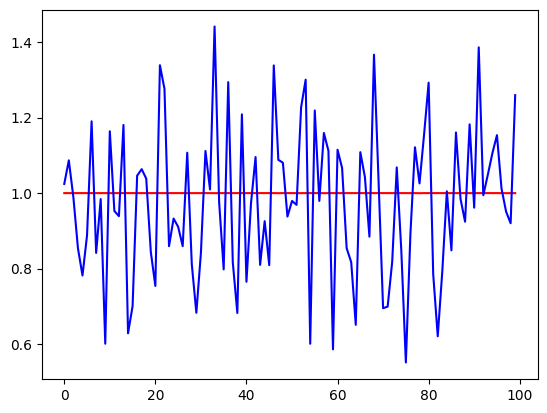

In [ ]:
#Discrepancia de las medias
dscm=(np.mean(ydn)-np.mean(ys))/np.mean(ydn)
print("La discrepancia entre medias es:",dscm*100)

#Discrepancia entre desviaciones
dscv=(np.std(ydn)-np.std(ys))/np.std(ydn)
print("La discrepancia entre dispersiones:",dscv*100)

#La Grafica de los datos de referencia es:
plt.figure()
plt.plot(ydn[0:100,],'r',ys[0:100,],'b') #Nada más estoy graficando 100 datos #DATOS DE REFERENCIA ROJOS Y LOS AZULES SON LOS QUE ME ARROJA EL MODELO
plt.show()


3.2. MADALINE

Epoch 1/1000
10/10 [==============================] - 2s 6ms/step - loss: 127.0534
Epoch 2/1000
10/10 [==============================] - 0s 9ms/step - loss: 125.8929
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 124.8949
Epoch 4/1000
10/10 [==============================] - 0s 8ms/step - loss: 124.0510
Epoch 5/1000
10/10 [==============================] - 0s 8ms/step - loss: 123.3538
Epoch 6/1000
10/10 [==============================] - 0s 8ms/step - loss: 122.7855
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 122.3208
Epoch 8/1000
10/10 [==============================] - 0s 10ms/step - loss: 121.9370
Epoch 9/1000
10/10 [==============================] - 0s 9ms/step - loss: 121.6201
Epoch 10/1000
10/10 [==============================] - 0s 11ms/step - loss: 121.3606
Epoch 11/1000
10/10 [==============================] - 0s 11ms/step - loss: 121.1401
Epoch 12/1000
10/10 [==============================] - 0s 9ms/step - loss: 120.957

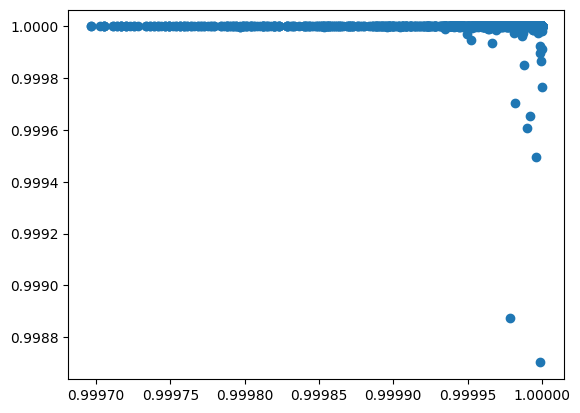

La correlación es:           0         1
0  1.000000 -0.027526
1 -0.027526  1.000000


<Figure size 640x480 with 0 Axes>

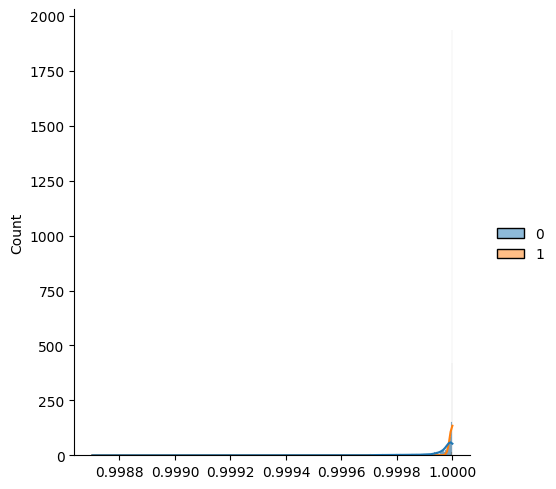

La discrepancia entre medias es: -0.0034016738202608233
La discrepancia entre dispersiones: 27.71116917704508


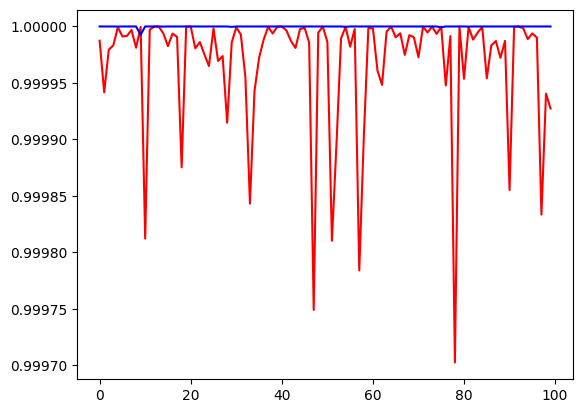

In [ ]:
NE=6 #Definimos número de entradas
model=Sequential()
model.add(Dense(20,activation='linear',use_bias=False,input_dim=NE))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mse')
history=model.fit(XDn,yd1,epochs=1000,batch_size=200)
ys1=model.predict(XDn)


#Gráfico de Dispersión
plt.figure()
plt.scatter(ydn,ys1)
plt.show()

#Matriz de Correlación
df2=pd.DataFrame(np.column_stack((ydn,ys1)))
print("La correlación es:",df2.corr())

#Efectos Independientes
W2=np.array(model.layers[0].get_weights()[0])
C2=np.array(model.layers[1].get_weights()[0])
np.dot(W2,C2)

#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydn.flatten(),ys1.flatten()),kde=True)
plt.show()

#Discrepancia entre medias
dscm=(np.mean(ydn)-np.mean(ys1))/np.mean(ydn)
print("La discrepancia entre medias es:",dscm*100) #el 25% es bueno

#Discrepancia entre desviaciones
dscv=(np.std(ydn)-np.std(ys1))/np.std(ydn)
print("La discrepancia entre dispersiones:",dscv*100) #el 5% es bueno

#La grafica de los datos de referencia es:
plt.figure()
plt.plot(ydn[0:100,],"r",ys1[0:100],"b")
plt.show()

**4. Análisis de Resultado **

Durante la elaboración de los modelos, el programa arrojó que en términos generales la correlación entre las variables seleccionadas es muy mala, mostrando que los datos entre ellas son muy dispersos. Sin embargo, se considera que las variables que tuvieron un mejor comportamiento frente a la variable de salida, fueron smoking y chronic kidney disease. ** Asimismo, se realizó la correlación de las variables dando como resultado que la mejor variable frente a la variable de salida es 'Chronic_Kidney_Disease', ya muestra una correlación de 0.429. Por otro lado la variable que tiene menor correlación con la variable de salida es la edad con -0.066.

El modelo de árbol de decisión implementado para identificar pacientes con presión arterial alta ha sido evaluado con resultados significativos. De los 2000 pacientes analizados, 987 (49.35%) tienen presión arterial alta y 1013 (50.65%) no la tienen, lo que muestra una distribución relativamente equilibrada. En el análisis de los nodos del árbol, se identificó un nodo puro con solo un paciente, lo cual indica condiciones muy específicas y raras: Enfermedad Renal Crónica <= 0.5, Nivel de Hemoglobina <= 14.545, <= 8.835, y <= 8.115. Por otro lado, el nodo 13, con un índice de Gini de 0.035, incluye 169 pacientes y es muy efectivo para identificar hipertensión bajo las condiciones de Enfermedad Renal Crónica <= 0.5, Nivel de Hemoglobina >= 14.2, >= 14.725, y Actividad Física >= 853.0. En el nodo 14, el 98.22% de los pacientes (166 de 169) tienen presión arterial alta, lo que destaca la precisión del modelo en este segmento. La evaluación general del modelo mostró una exactitud del 76.8%, una tasa de error del 23.2%, una precisión del 81.73%, una especificidad del 84% y una sensibilidad del 69.7%, lo que indica que el modelo es razonablemente eficaz en la clasificación de pacientes, aunque hay margen para mejorar, especialmente en la identificación de todos los casos de hipertensión.

Finalmente hicimos los dos modelos Adaline y Madaline, y el mejor clasificado es Adaline. La correlación entre las predicciones del modelo Adaline y la variable de salida 'Level_Hemoglobin' es baja y negativa con (-0.147203). Esto sugiere que aunque fue el mejor modelo, no está capturando bien la relación entre las variables independientes y la variable de salida. Por otro lado,
los coeficientes indican que la variable 'Age' con (0.56284416) tiene el mayor efecto independiente en la predicción del modelo Adaline, Este peso sugiere que la edad tiene un impacto moderado en el nivel de hemoglobina. seguida por 'Level_Stress' (0.43977126)  y 'Physical_Activity'(0.3171032). La discrepancia entre medias es de  **5.001551261802119** no es un valor cercano a cero. De hecho, es bastante significativo. (lo cual no es tan bueno),
Este valor sugiere que, en promedio, las predicciones del modelo Adaline sobrestiman el nivel real de hemoglobina por aproximadamente 5 unidades.

La discrepancia entre dispersiones de **-362179.58130543213** es un valor extremadamente alto y negativo. Esto indica una gran diferencia entre la dispersión (varianza) de las predicciones del modelo y la dispersión de la variable de salida real.



